<a href="https://colab.research.google.com/github/satwikdg/Stock-Market-Prediction/blob/main/satwikdg_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt


In [2]:
#Load the data S&P500
data = pd.read_csv('SPY.csv')
#Show the data
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-12-30,19833.169922,19852.550781,19718.669922,19762.599609,271910000,19762.599609
1,2016-12-29,19835.460938,19878.439453,19788.939453,19819.779297,172040000,19819.779297
2,2016-12-28,19964.310547,19981.109375,19827.310547,19833.679688,188350000,19833.679688
3,2016-12-27,19943.460938,19980.240234,19939.800781,19945.039062,158540000,19945.039062
4,2016-12-23,19908.609375,19934.150391,19899.060547,19933.810547,158260000,19933.810547
...,...,...,...,...,...,...,...
2514,2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,223500000,12423.490234
2515,2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,235220000,12398.009766
2516,2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,259060000,12480.690430
2517,2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,327200000,12474.519531


<Axes: >

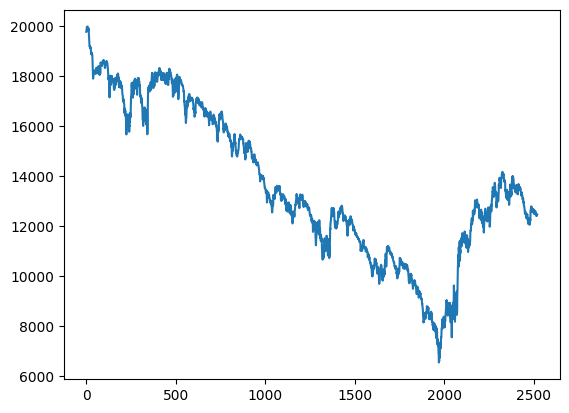

In [3]:
#Show the data visually
data['Close'].plot()

In [4]:
#Split the data into training and testing data sets
train_data = data.iloc[:int(.99*len(data)), :]
test_data = data.iloc[int(.99*len(data)):, :]

In [5]:
#Define the features and target variable
features = ['Open', 'Volume']
target = 'Close'

In [6]:
#Create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
#Make and show the predictions on the test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[12651.125  12652.55   12645.244  12652.55   12563.924  12506.277
 12487.017  12449.0205 12476.272  12612.218  12541.041  12483.757
 12610.313  12442.191  12568.504  12484.838  12508.411  12523.48
 12427.212  12416.005  12452.772  12381.872  12434.143  12489.272
 12337.542  12489.497 ]


In [8]:
#show the actual values
print('Actual Values:')
print(test_data[target])

Actual Values:
2493    12666.870117
2494    12666.309570
2495    12661.740234
2496    12653.490234
2497    12673.679688
2498    12621.690430
2499    12523.309570
2500    12490.780273
2501    12487.019531
2502    12502.559570
2503    12621.769531
2504    12533.799805
2505    12477.160156
2506    12565.530273
2507    12567.929688
2508    12577.150391
2509    12582.589844
2510    12556.080078
2511    12514.980469
2512    12442.160156
2513    12416.599609
2514    12423.490234
2515    12398.009766
2516    12480.690430
2517    12474.519531
2518    12463.150391
Name: Close, dtype: float64


In [10]:
#Show the model accuracy
accuracy = model.score(test_data[features],test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.27300838364954705


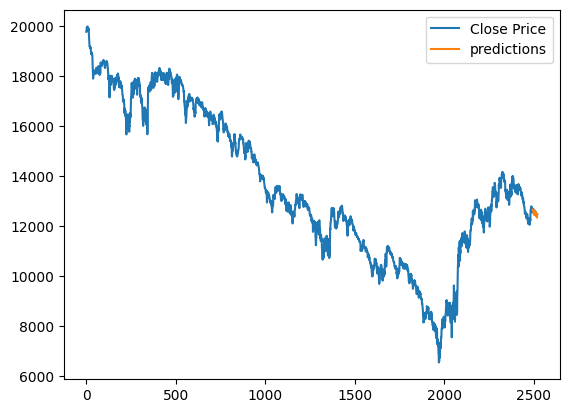

In [11]:
#Plot the predictions and the close price
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'predictions')
plt.legend()
plt.show()